In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.utils import resample
from sklearn.pipeline import Pipeline

# import warnings
# # Silencia só o aviso "Variables are collinear" vindo do módulo discriminant_analysis
# warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.discriminant_analysis")
# warnings.filterwarnings("ignore", message="Variables are collinear")


In [60]:
df = pd.read_csv("group_9.csv")

In [61]:
print("Dataset dimension:", df.shape)
display(df.head())

Dataset dimension: (3000, 49)


duration_1  duration_2  duration_3  duration_4  duration_5  loudness_level  \
0         1.0         0.0         0.0         0.0         0.0             3.0   
1         0.0         1.0         0.0         0.0         0.0             3.0   
2         0.0         1.0         0.0         0.0         0.0             0.0   
3         1.0         0.0         0.0         0.0         0.0             1.0   
4         0.0         1.0         0.0         0.0         0.0             3.0   

   popularity_level  tempo_class  time_signature  key_mode  ...  \
0               3.0          1.0        0.221824 -0.949100  ...   
1               2.0          1.0       -2.089669  1.020640  ...   
2               3.0          1.0        0.221824  0.204605  ...   
3               3.0          1.0        0.221824 -0.076786  ...   
4               3.0          1.0       -2.089669 -1.511882  ...   

   is_instrumental  is_dance_hit  temp_zscore  resonance_factor  timbre_index  \
0              0.0           0.0    -0.128149         -1.114081      0.183527   
1              0.0           0.0     0.696314         -0.630931      0.857540   
2              0.0           0.0    -0.438474         -0.942060      0.198153   
3              0.0           0.0    -1.162765         -0.547996      0.272156   
4              0.0           0.0     0.025929         -0.214150      0.523902   

   echo_constant  distorted_movement  signal_power  target_class  \
0              1           -0.292728         0.972       class_7   
1              1           -0.154433         0.952       class_7   
2              1           -0.575080         0.913       class_7   
3              1           -0.165958         0.466       class_7   
4              1           -1.669916         0.905       class_7   

   target_regression  
0           0.796292  
1           1.110125  
2           0.616958  
3           0.347959  
4           0.930791  

[5 rows x 49 columns]

Graphic settings

In [62]:
# sns.set(style="whitegrid", context="notebook")
# plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")

Dataset info

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration_1                     3000 non-null   float64
 1   duration_2                     3000 non-null   float64
 2   duration_3                     3000 non-null   float64
 3   duration_4                     3000 non-null   float64
 4   duration_5                     3000 non-null   float64
 5   loudness_level                 3000 non-null   float64
 6   popularity_level               3000 non-null   float64
 7   tempo_class                    3000 non-null   float64
 8   time_signature                 3000 non-null   float64
 9   key_mode                       3000 non-null   float64
 10  artist_song_count              3000 non-null   float64
 11  album_freq                     3000 non-null   float64
 12  movement_index                 3000 non-null   f

DESCRIPTIVE STATISTICS
 Basic statistics + skewness and curtose

In [64]:
num_desc = df.describe().T
num_desc["skew"] = df.select_dtypes(include=[np.number]).skew()
num_desc["kurtosis"] = df.select_dtypes(include=[np.number]).kurtosis()
display(num_desc.head(10))

count      mean       std       min       25%       50%  \
duration_1        3000.0  0.129667  0.335992  0.000000  0.000000  0.000000   
duration_2        3000.0  0.239333  0.426748  0.000000  0.000000  0.000000   
duration_3        3000.0  0.347667  0.476309  0.000000  0.000000  0.000000   
duration_4        3000.0  0.236333  0.424900  0.000000  0.000000  0.000000   
duration_5        3000.0  0.047000  0.211674  0.000000  0.000000  0.000000   
loudness_level    3000.0  1.646000  1.333145  0.000000  0.000000  2.000000   
popularity_level  3000.0  1.730667  1.047772  0.000000  1.000000  1.000000   
tempo_class       3000.0  1.016667  0.305101  0.000000  1.000000  1.000000   
time_signature    3000.0  0.063872  0.838877 -6.712656  0.221824  0.221824   
key_mode          3000.0  0.029570  1.005989 -1.511882 -0.920961  0.176466   

                       75%       max      skew   kurtosis  
duration_1        0.000000  1.000000  2.205886   2.867844  
duration_2        0.000000  1.000000  1.222458  -0.505934  
duration_3        1.000000  1.000000  0.640068  -1.591375  
duration_4        0.000000  1.000000  1.241904  -0.457980  
duration_5        0.000000  1.000000  4.283019  16.355159  
loudness_level    3.000000  4.000000  0.049514  -1.488613  
popularity_level  3.000000  4.000000  0.643058  -1.067581  
tempo_class       1.000000  3.000000  0.564254   8.577322  
time_signature    0.221824  2.533318 -4.879960  34.262170  
key_mode          1.020640  1.611562 -0.020314  -1.289904

UNIVARIATE ANALYSIS 
    (Distribution of individual features)

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

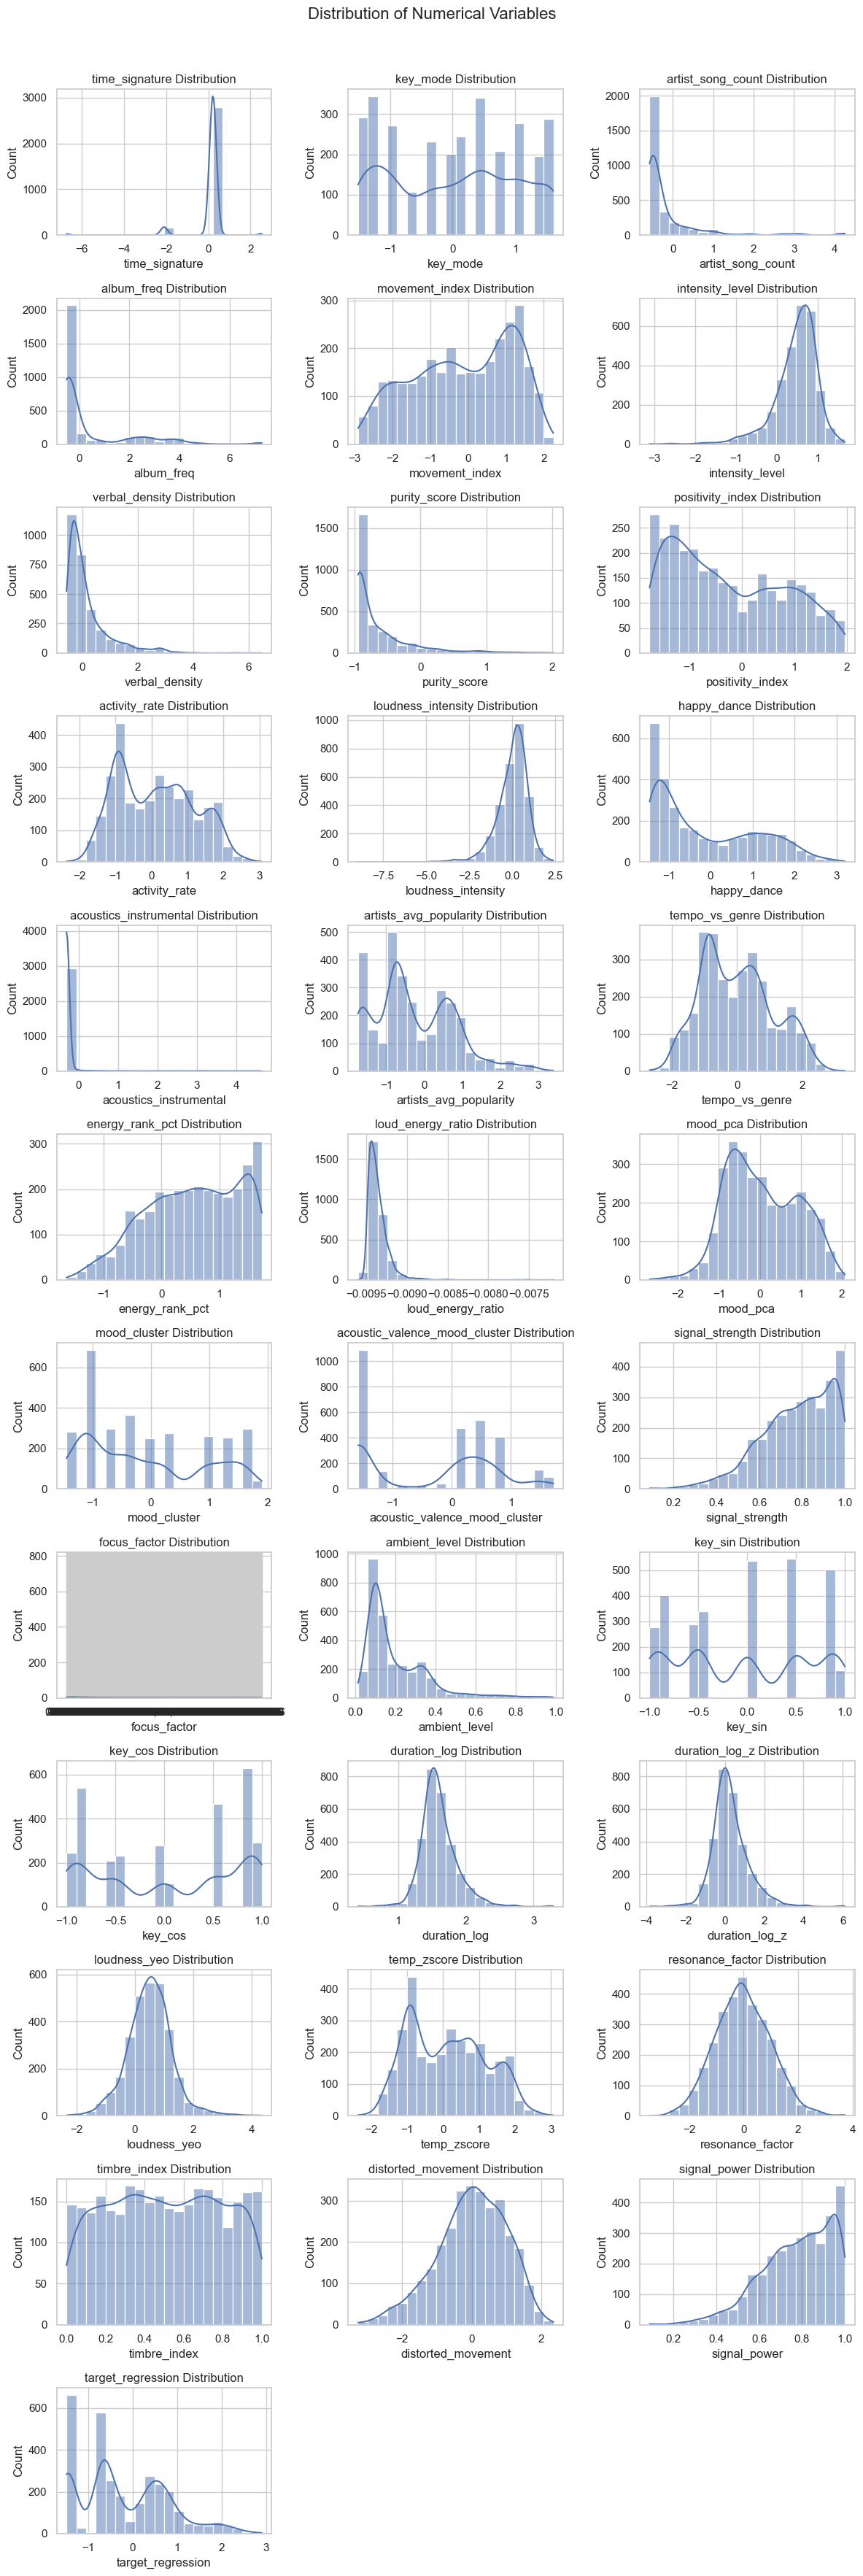

In [65]:
# Initial setup
numeric_columns = [
    'time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
    'intensity_level', 'verbal_density', 'purity_score', 'positivity_index', 'activity_rate',
    'loudness_intensity', 'happy_dance', 'acoustics_instrumental', 'artists_avg_popularity',
    'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
    'acoustic_valence_mood_cluster', 'signal_strength', 'focus_factor', 'ambient_level',
    'key_sin', 'key_cos', 'duration_log', 'duration_log_z', 'loudness_yeo', 'temp_zscore',
    'resonance_factor', 'timbre_index', 'distorted_movement', 'signal_power', 'target_regression'
]

# Grid setup
n = len(numeric_columns)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 3 * nrows))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Flatten axes
axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

# Generate histograms
for i, col in enumerate(numeric_columns):
    ax = axes_flat[i]
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'{col} Distribution')

# Hide unused axes if any
for j in range(len(numeric_columns), len(axes_flat)):
    axes_flat[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

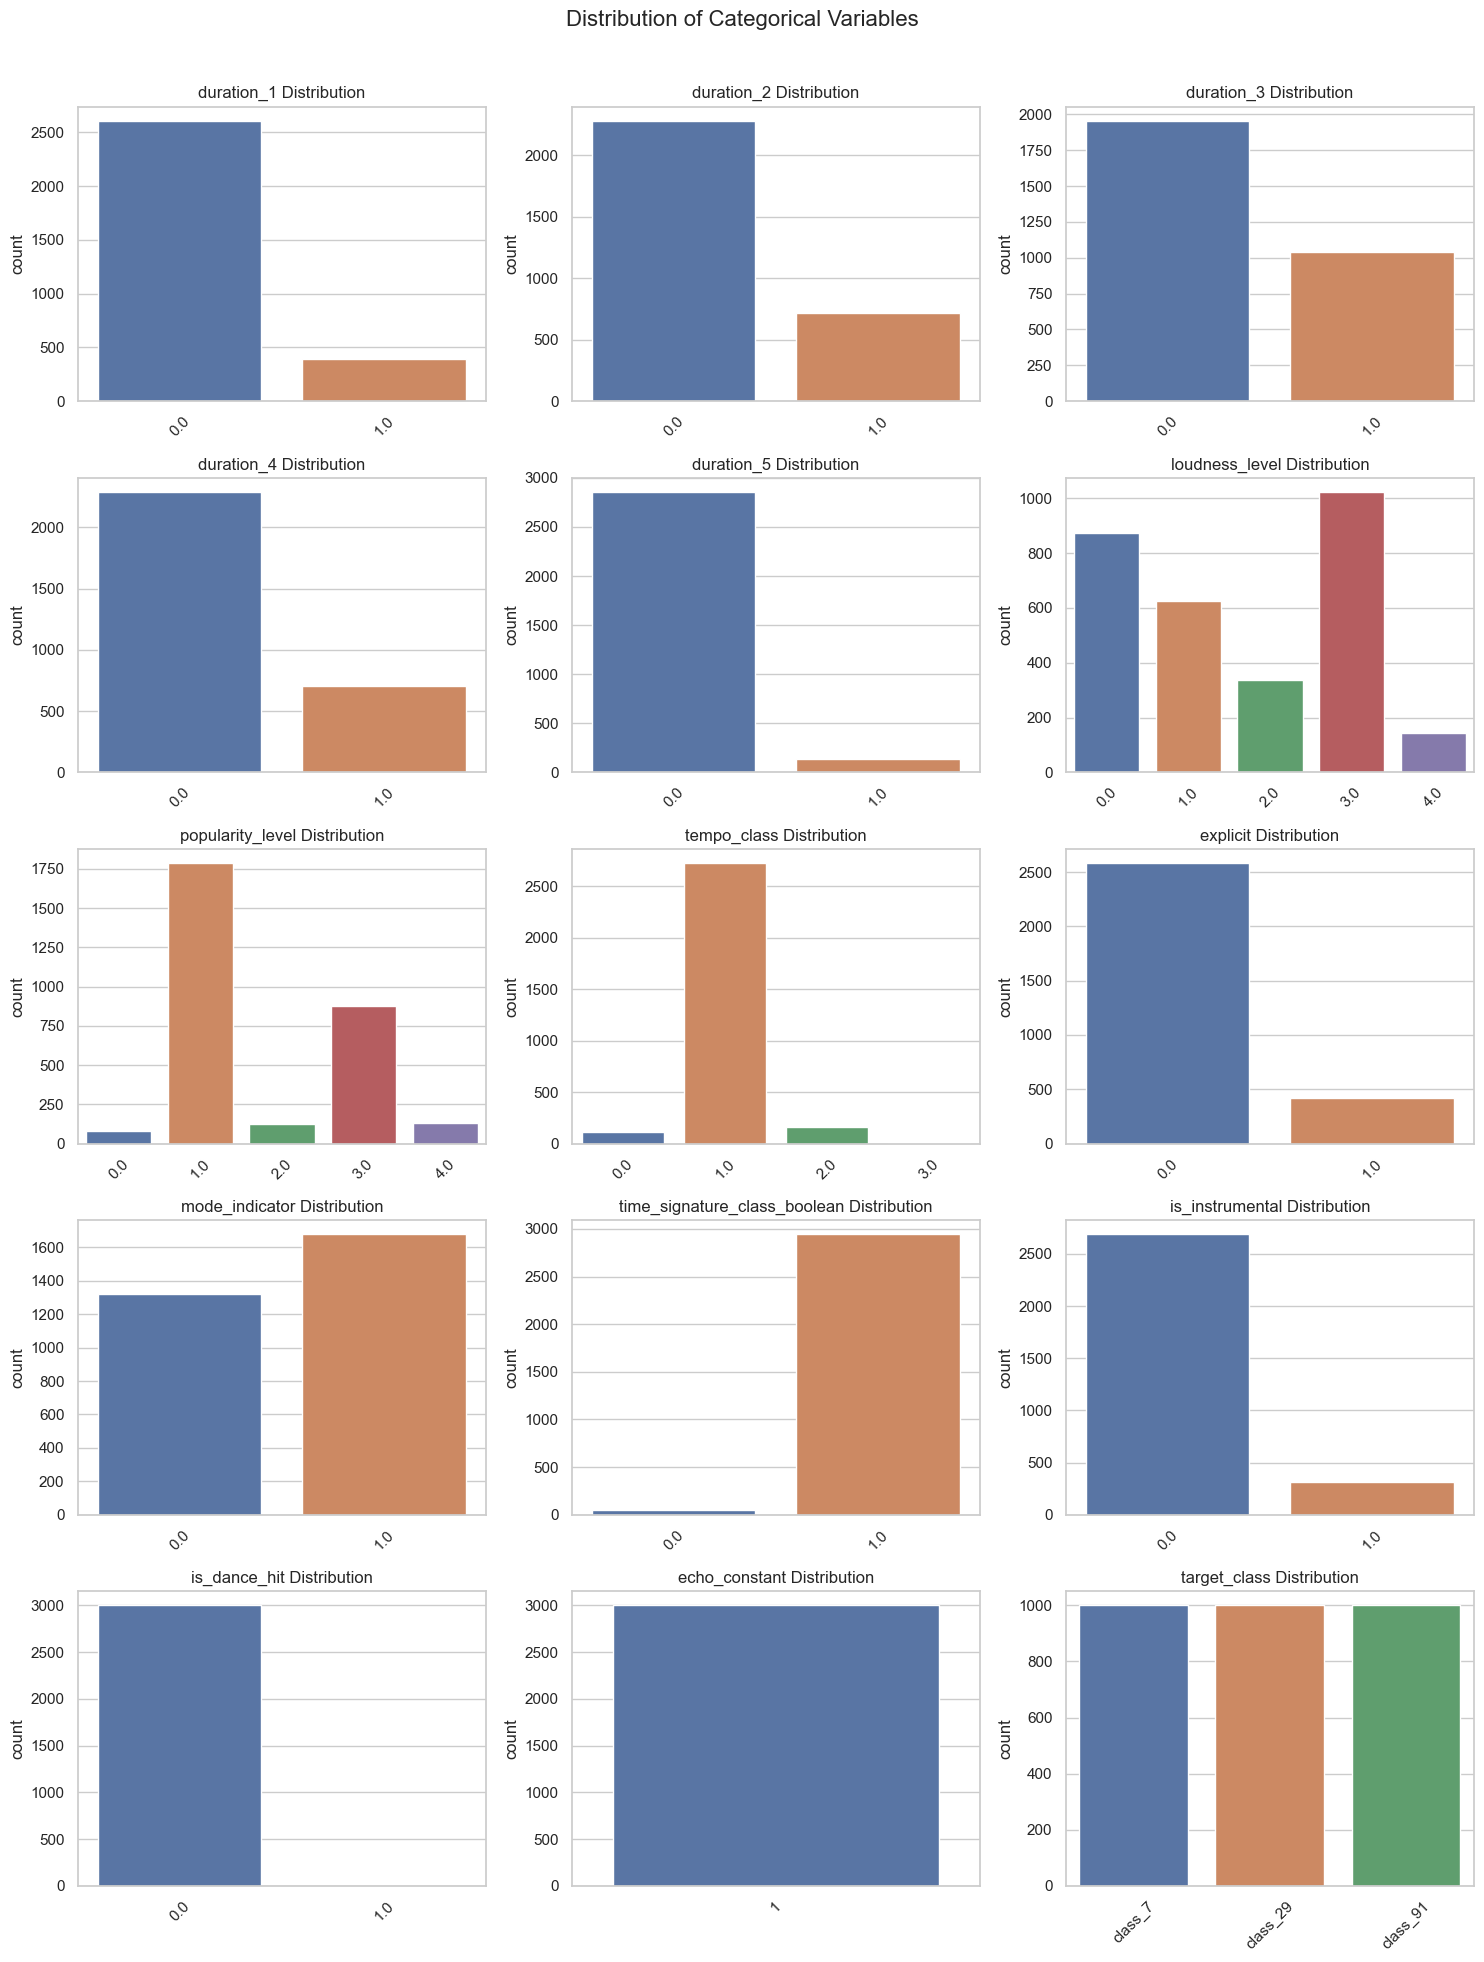

In [66]:
# Initial setup
categorical_columns = [
    'duration_1',
    'duration_2',
    'duration_3',
    'duration_4',
    'duration_5',
    'loudness_level',
    'popularity_level',
    'tempo_class',
    'explicit',
    'mode_indicator',
    'time_signature_class_boolean',
    'is_instrumental',
    'is_dance_hit',
    'echo_constant',
    'target_class'
]

# Grid setup
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

axes = axes.flatten()  # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel("")                        # Remove x labels for cleaner look if long names
    axes[idx].tick_params(axis='x', rotation=45)    # Rotate labels for readability

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



BIVARIATE ANALYSIS (Correlation between features and the different target variables)

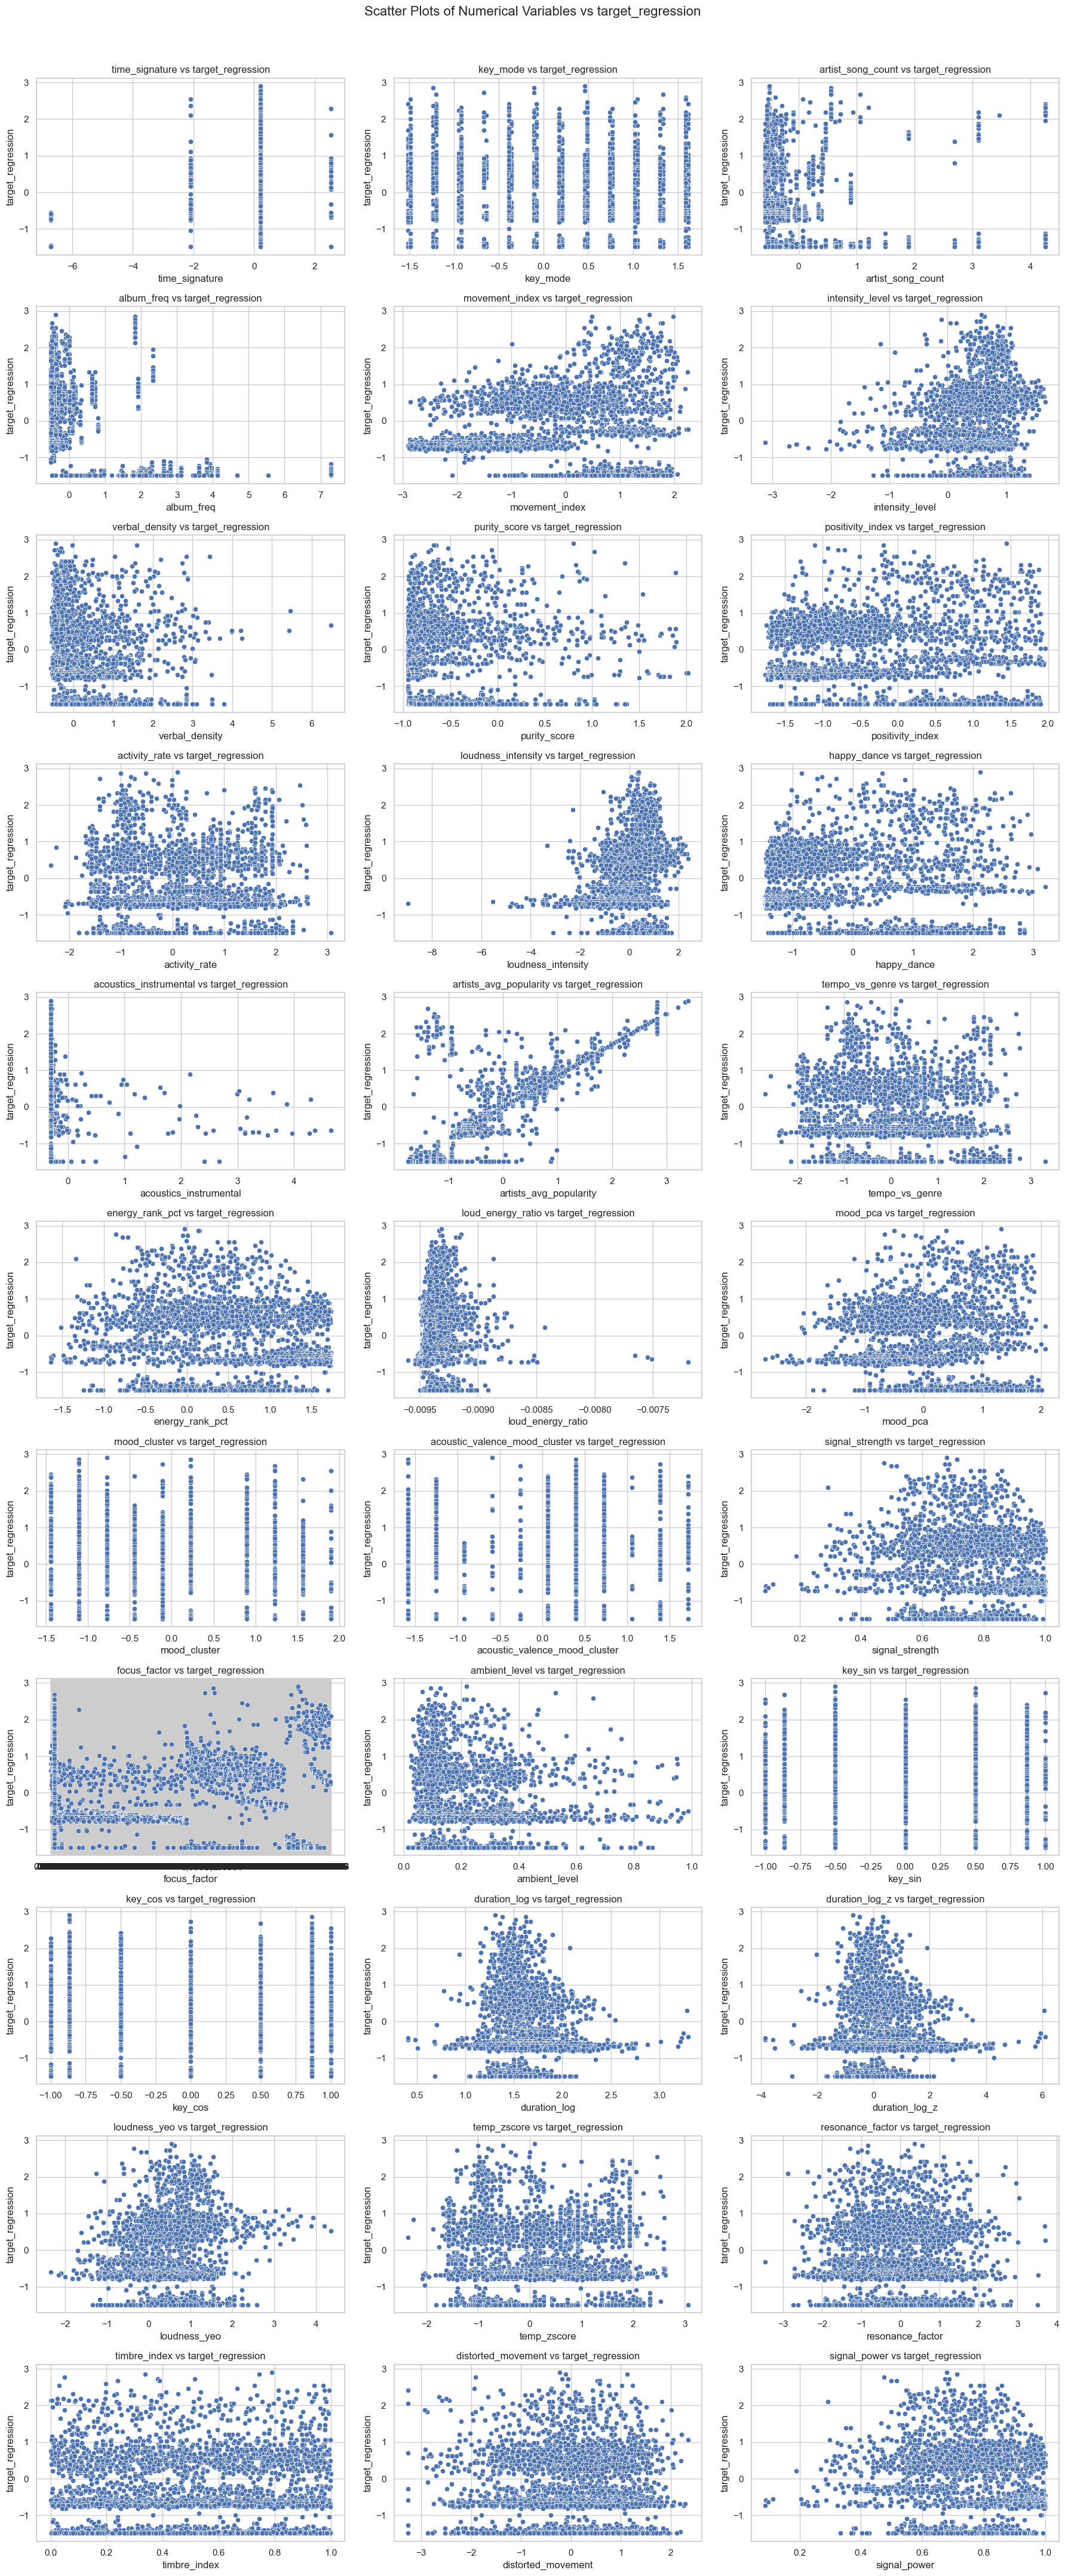

In [67]:
# Initial setup
target_column = 'target_regression'

numeric_columns = [
    'time_signature', 'key_mode', 'artist_song_count', 'album_freq', 'movement_index',
    'intensity_level', 'verbal_density', 'purity_score', 'positivity_index', 'activity_rate',
    'loudness_intensity', 'happy_dance', 'acoustics_instrumental', 'artists_avg_popularity',
    'tempo_vs_genre', 'energy_rank_pct', 'loud_energy_ratio', 'mood_pca', 'mood_cluster',
    'acoustic_valence_mood_cluster', 'signal_strength', 'focus_factor', 'ambient_level',
    'key_sin', 'key_cos', 'duration_log', 'duration_log_z', 'loudness_yeo', 'temp_zscore',
    'resonance_factor', 'timbre_index', 'distorted_movement', 'signal_power'
]

# Grid setup
n_cols = 3
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Scatter Plots of Numerical Variables vs {target_column}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(numeric_columns):
    sns.scatterplot(x=col, y=target_column, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_column}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target_column)

# Hide extra subplots (if any)
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


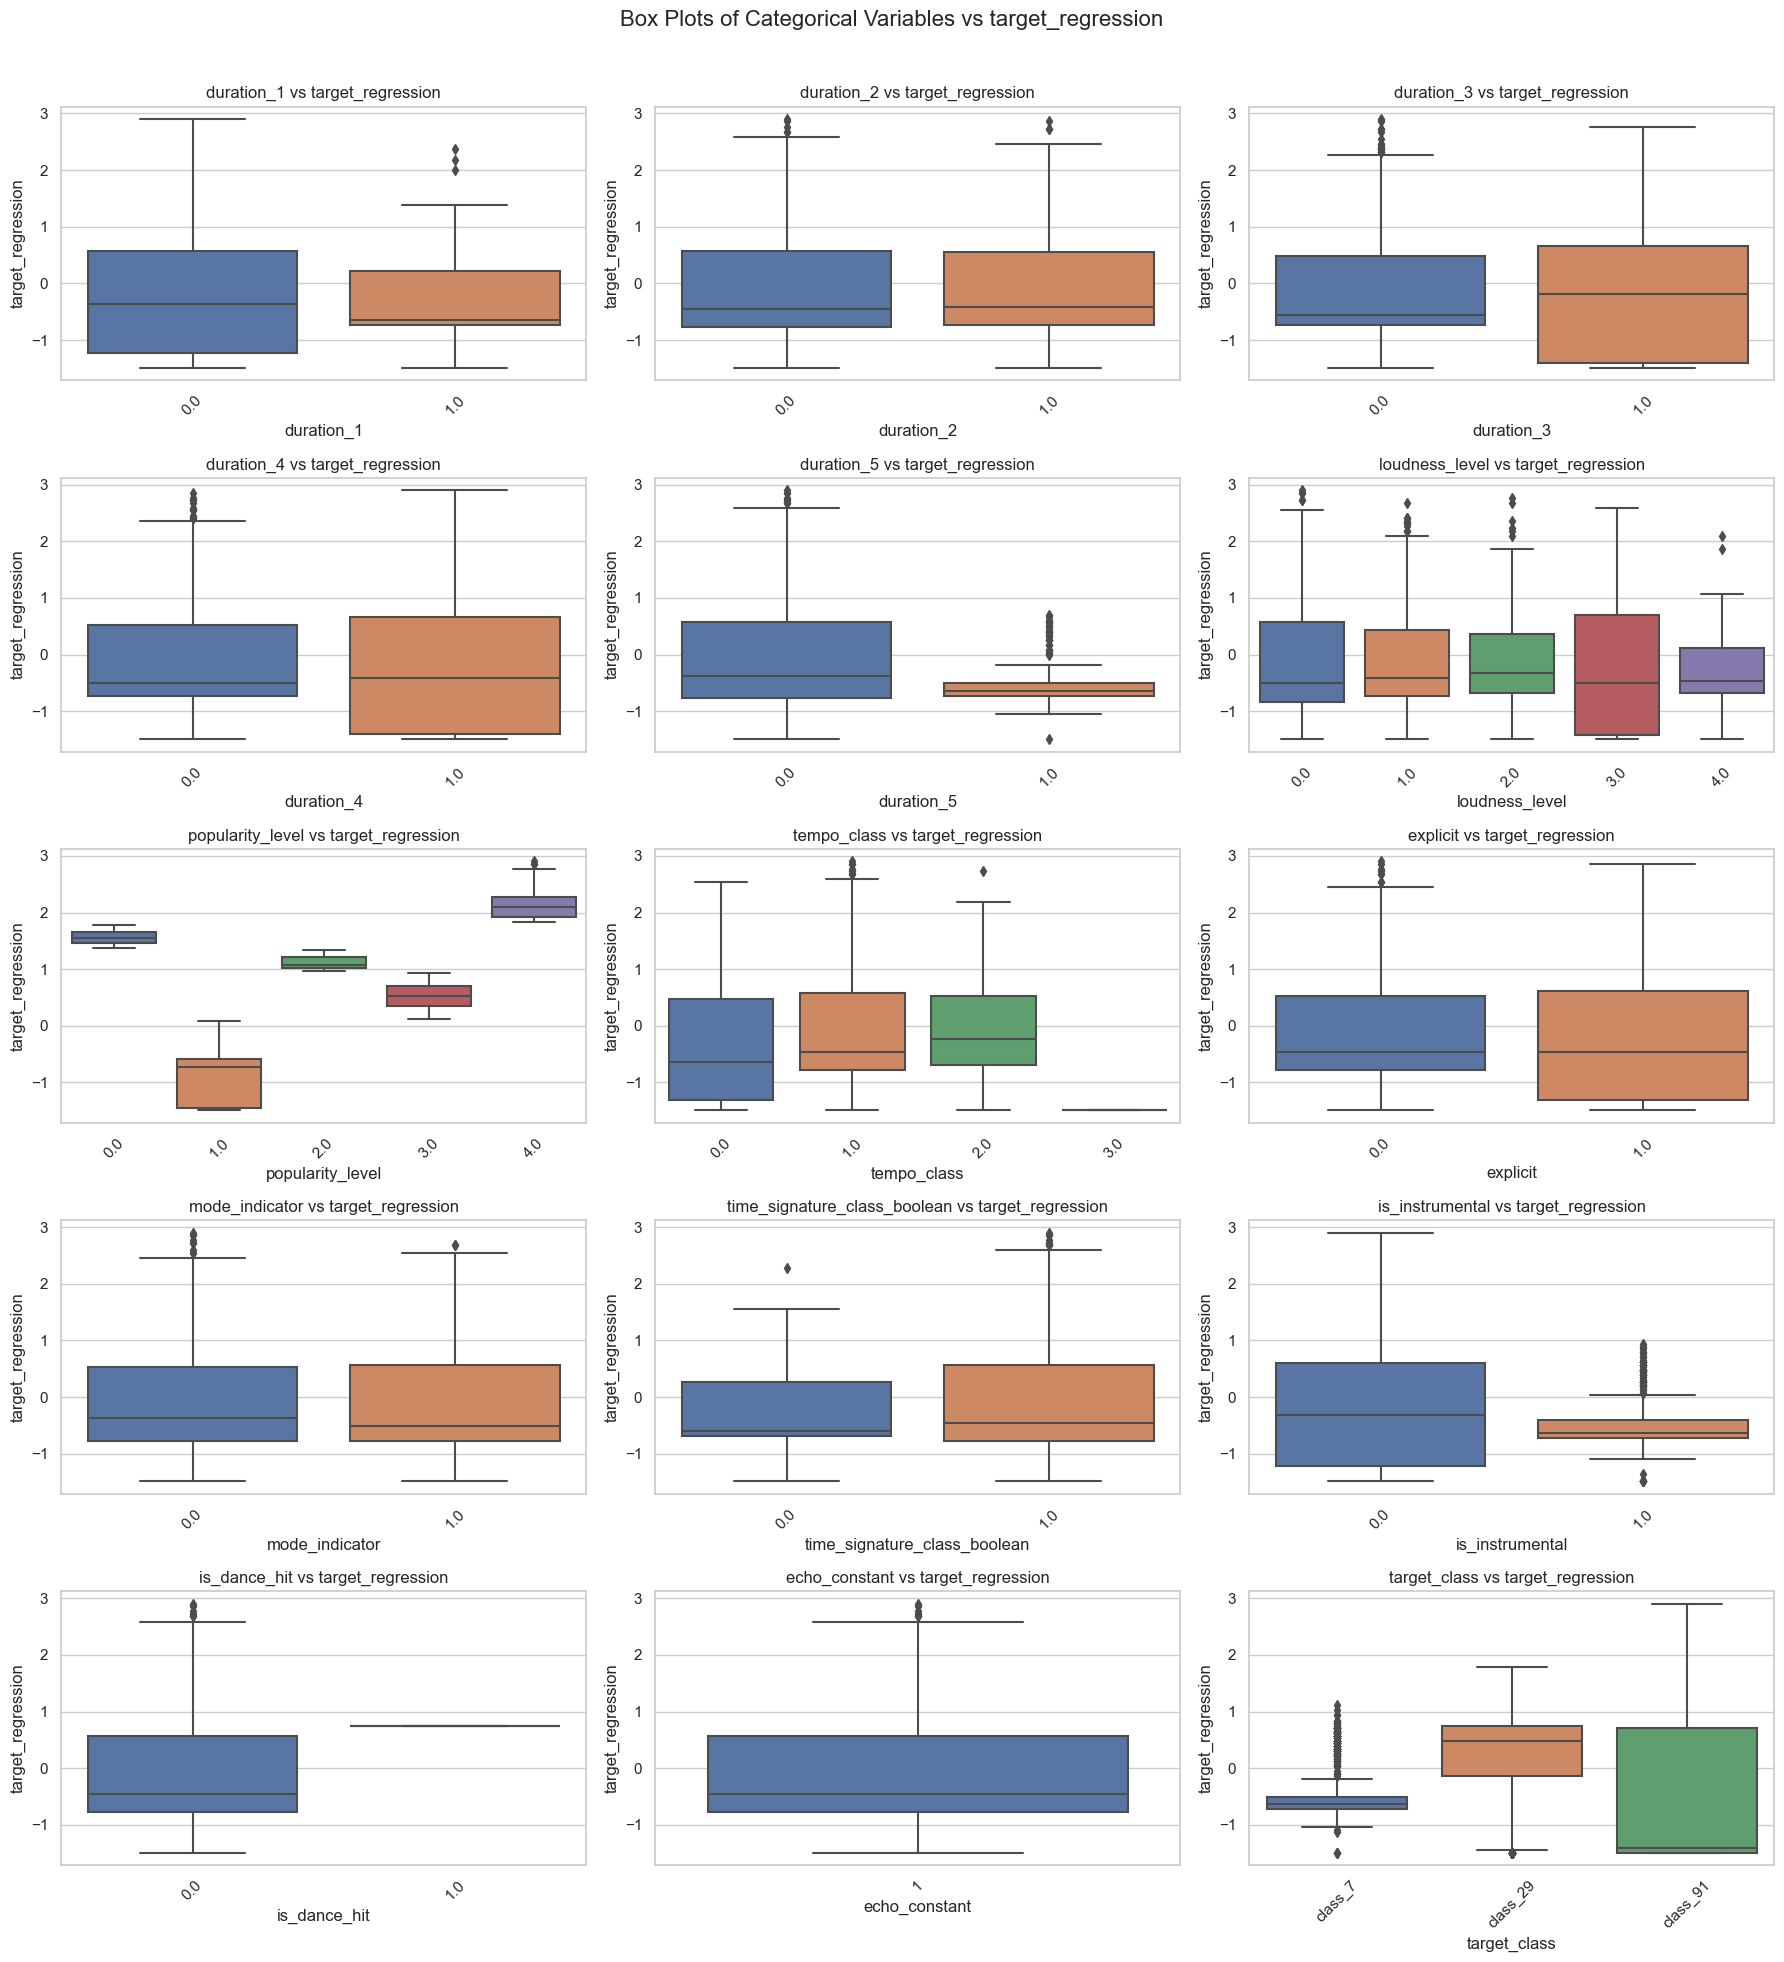

In [68]:
# Initial setup
target_column = 'target_regression'

categorical_columns = [
    'duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5',
    'loudness_level', 'popularity_level', 'tempo_class', 'explicit',
    'mode_indicator', 'time_signature_class_boolean', 'is_instrumental',
    'is_dance_hit', 'echo_constant', 'target_class'
]

# Grid setup
n_cols = 3
n_rows = math.ceil(len(categorical_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
fig.suptitle(f'Box Plots of Categorical Variables vs {target_column}', fontsize=16)

axes = axes.flatten() # Flatten axes

for idx, col in enumerate(categorical_columns):
    sns.boxplot(x=col, y=target_column, data=df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs {target_column}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# Data preparation


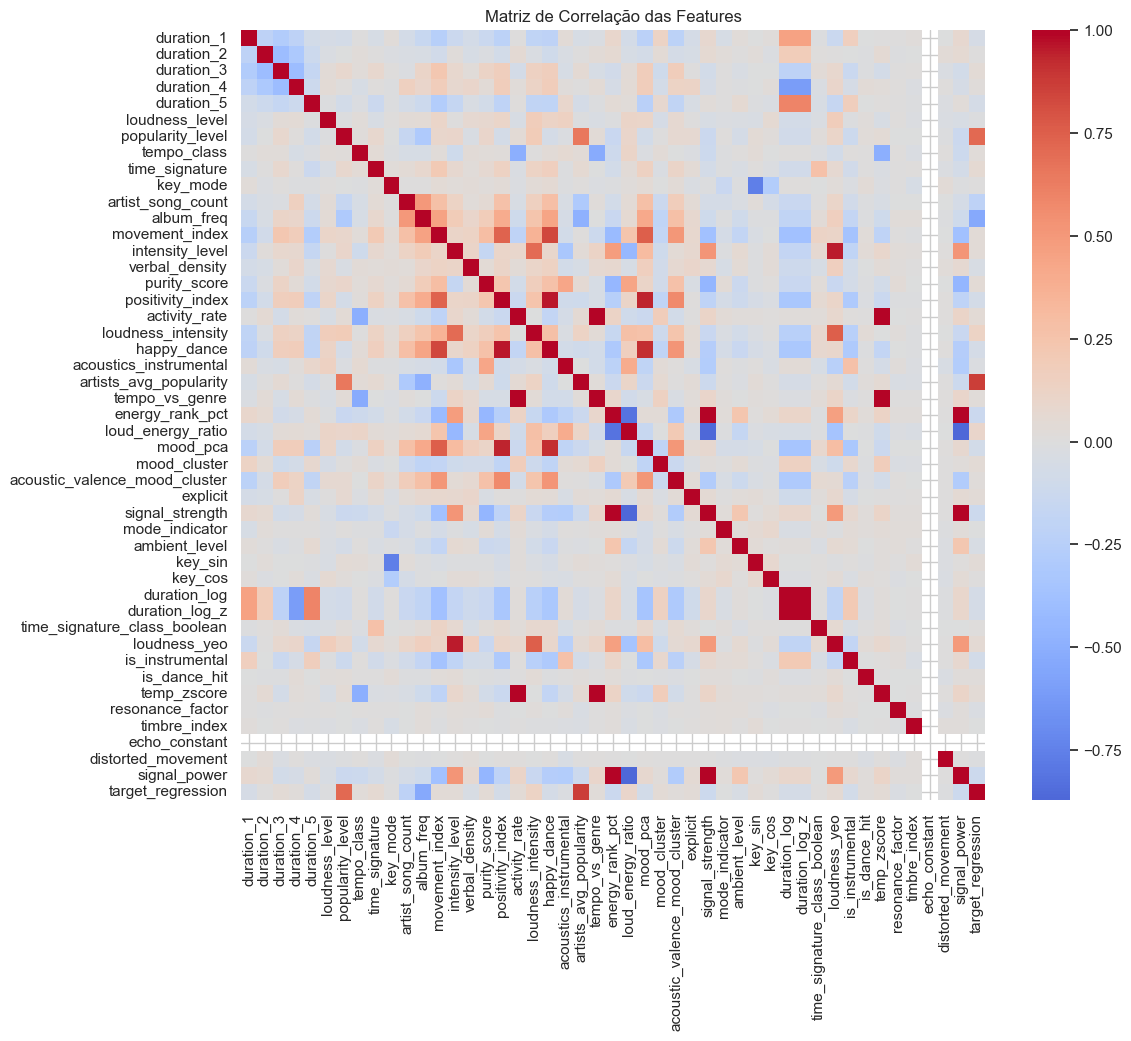

In [69]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação das Features")
plt.show()

In [70]:
#Criar máscara para evitar comparar duas vezes
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

#Encontrar colunas com correlação acima do limiar (ex: 0.9)
threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Features removidas por alta correlação ({len(to_drop)}):")
print(to_drop)

#Criar novo dataset sem as features correlacionadas
df = df.drop(columns=to_drop)

Features removidas por alta correlação (8):
['happy_dance', 'tempo_vs_genre', 'mood_pca', 'signal_strength', 'duration_log_z', 'loudness_yeo', 'temp_zscore', 'signal_power']


# 3 Methods Application - Regression


Best Feature for Regression

Top 10 features by R2 score:
                   Feature       MAE       MSE        R2
20  artists_avg_popularity  0.208298  0.244732  0.752696
6         popularity_level  0.455895  0.489721  0.505132
11              album_freq  0.688911  0.707384  0.285181
10       artist_song_count  0.804022  0.941778  0.048323
18      loudness_intensity  0.818335  0.973662  0.016104
21         energy_rank_pct  0.822498  0.973928  0.015835
27            focus_factor  0.822217  0.977629  0.012095
22       loud_energy_ratio  0.832881  0.980671  0.009021
33         is_instrumental  0.831188  0.981840  0.007840
16        positivity_index  0.844038  0.984937  0.004710


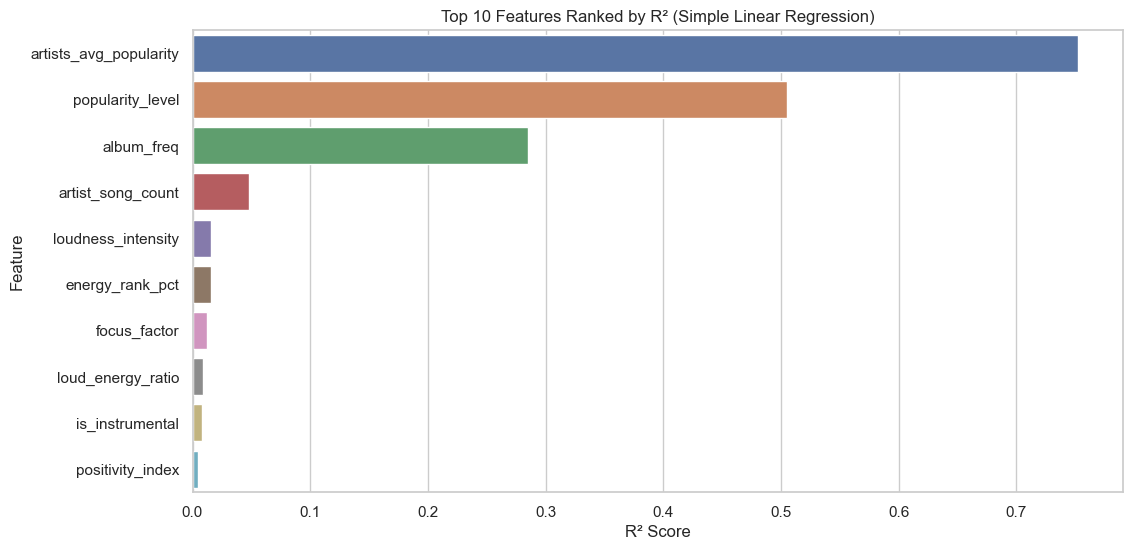

In [ ]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)

target_column = 'target_regression'  
features = [
    'duration_1','duration_2','duration_3','duration_4','duration_5','loudness_level',
    'popularity_level','tempo_class','time_signature','key_mode','artist_song_count',
    'album_freq','movement_index','intensity_level','verbal_density','purity_score',
    'positivity_index','activity_rate','loudness_intensity',
    'acoustics_instrumental','artists_avg_popularity','energy_rank_pct',
    'loud_energy_ratio','mood_cluster','acoustic_valence_mood_cluster',
    'explicit','mode_indicator','focus_factor','ambient_level',
    'key_sin','key_cos','duration_log','time_signature_class_boolean','is_instrumental','is_dance_hit','resonance_factor',
    'timbre_index','echo_constant','distorted_movement'
]

results = []

# Loop Through Features and Fit SLR

for feature in features:
    X = df[[feature]]
    y = df[[target_column]]

    lr = LinearRegression()
    lr.fit(X, y)
    pred = lr.predict(X)

    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)

    results.append([feature, mae, mse, r2])

# Convert to DataFrame and Sort

results_df = pd.DataFrame(results, columns=['Feature', 'MAE', 'MSE', 'R2'])
results_df = results_df.sort_values(by='R2', ascending=False)
print("Top 10 features by R2 score:")
print(results_df.head(10))

# Plot R² Bar Chart

plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Feature', data=results_df.head(10))  # Plot top 10
plt.title('Top 10 Features Ranked by R² (Simple Linear Regression)')
plt.xlabel('R² Score')
plt.ylabel('Feature')
plt.show()

Simple Linear Regression

In [73]:
# Replace commas with dots and convert to float
df['artists_avg_popularity'] = df['artists_avg_popularity'].astype(str).str.replace(',', '.', regex=False)
df['target_regression'] = df['target_regression'].astype(str).str.replace(',', '.', regex=False)

# Convert to numeric
df['artists_avg_popularity'] = pd.to_numeric(df['artists_avg_popularity'], errors='coerce')
df['target_regression'] = pd.to_numeric(df['target_regression'], errors='coerce')

x=df[['artists_avg_popularity']]
y=df[['target_regression']]
lr = LinearRegression()
lr_model = lr.fit(x, y)

predictions = lr_model.predict(x)
df['slr_result'] = predictions

slr_error = y - predictions
df['slr_error'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y.values) ** 2))
print("R2-score: %.2f" % r2_score(y.values , predictions) )

Slope:  [[0.8371356]]
Intercept:  [0.01743991]
Mean absolute error: 0.21
Residual sum of squares (MSE): 0.24
R2-score: 0.75


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27044\1166551315.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27044\1166551315.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

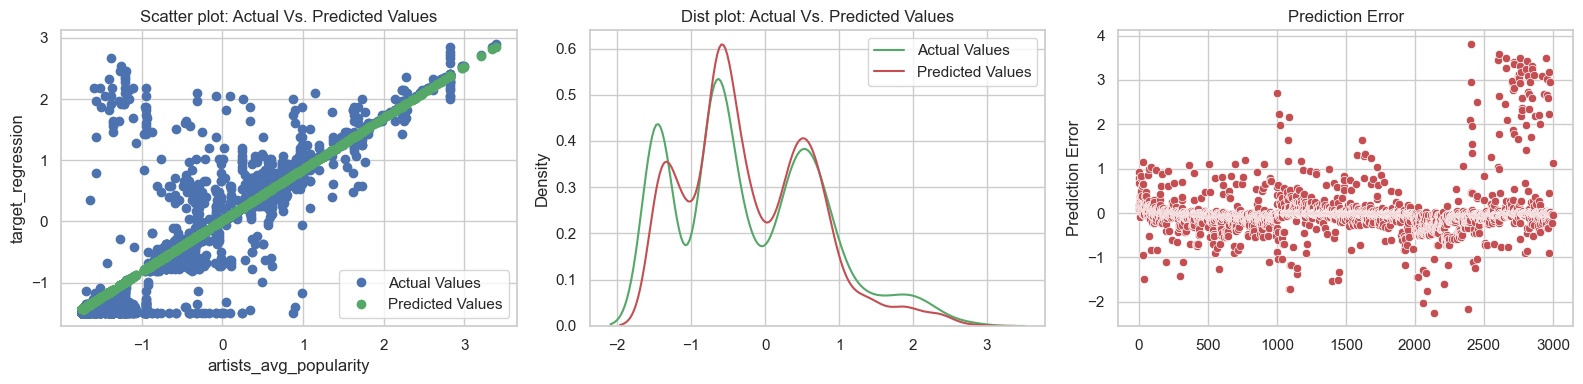

In [74]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x['artists_avg_popularity'], y,'bo',label='Actual Values')
axes[0].plot(x['artists_avg_popularity'], predictions,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("artists_avg_popularity")
axes[0].set_ylabel("target_regression")
axes[0].legend()

sns.distplot(y, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=y.index,y='slr_error',data=df,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

Based on the analysis performed across all features, the variable artists_avg_popularity achieved the highest R² score.

This indicates that artists_avg_popularity is the best single predictor of target_regression, explaining the largest proportion of its variance among all tested features.

In other words, the average popularity of an artist has the strongest linear relationship with the target regression score, making it the most influential variable in this simple predictive model.

Multiple linear regression


  Feature Group  Num Features        R²       MAE      RMSE
0         Top 5             5  0.007131  0.828776  0.991232
1        Top 10            10  0.505524  0.455934  0.699523
2        Top 15            15  0.656213  0.379173  0.583277
3        Top 20            20  0.658952  0.379745  0.580948
4  All Features            39  0.826921  0.246600  0.413858

🏆 Best feature group: All Features (39 features)
→ R² = 0.827, MAE = 0.247, RMSE = 0.414


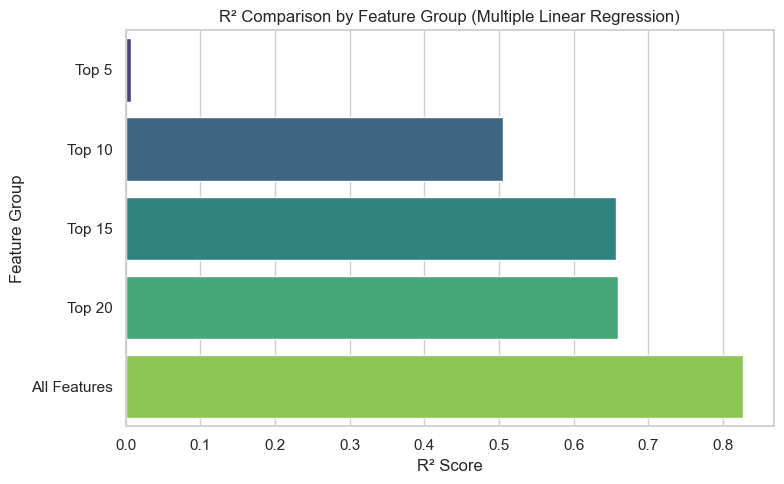

In [ ]:
# Create a clean copy of the dataset for classification
df_class = df.copy()

# Convert all columns to numeric (replace commas and coerce errors)
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define target variable and feature list
target_column = 'target_regression'


# Define feature groups to evaluate
feature_groups = {
    'Top 5': features[:5],
    'Top 10': features[:10],
    'Top 15': features[:15],
    'Top 20': features[:20],
    'All Features': features
}

results = []

# Fit Multiple Linear Regression for each feature group
for group_name, group_features in feature_groups.items():
    X = df[group_features]
    y = df[[target_column]]

    model = LinearRegression()
    model.fit(X, y)
    preds = model.predict(X)

    mae = mean_absolute_error(y, preds)
    mse = mean_squared_error(y, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, preds)

    results.append([group_name, len(group_features), r2, mae, rmse])


# Summarize and display results
results_df = pd.DataFrame(results, columns=['Feature Group', 'Num Features', 'R²', 'MAE', 'RMSE'])
print(results_df)

best_group = results_df.loc[results_df['R²'].idxmax()]
print(f"\n🏆 Best feature group: {best_group['Feature Group']} ({int(best_group['Num Features'])} features)")
print(f"→ R² = {best_group['R²']:.3f}, MAE = {best_group['MAE']:.3f}, RMSE = {best_group['RMSE']:.3f}")


# Plot — R² Comparison by Feature Group
plt.figure(figsize=(8, 5))
sns.barplot(x='R²', y='Feature Group', data=results_df, palette='viridis')
plt.title('R² Comparison by Feature Group (Multiple Linear Regression)', fontsize=12)
plt.xlabel('R² Score')
plt.ylabel('Feature Group')
plt.tight_layout()
plt.show()

In [76]:
# Select the best feature group identified previously
best_group_name = best_group['Feature Group']
best_features = feature_groups[best_group_name]

# Define X (features) and y (target variable)
X = df[best_features]
y = df[['target_regression']]

# Create and train the Multiple Linear Regression model
mlr = LinearRegression()
mlr_model = mlr.fit(X, y)

# Make predictions
predictions_mlr = mlr_model.predict(X)
df['mlr_result'] = predictions_mlr

# Calculate errors (residuals)
mlr_error = y - predictions_mlr
df['mlr_error'] = mlr_error

# Display model coefficients and performance metrics
print('Intercept:', mlr_model.intercept_)
print('Coefficients:')
for feat, coef in zip(best_features, mlr_model.coef_.flatten()):
    print(f'  {feat}: {coef:.4f}')

print("\nMean Absolute Error (MAE): %.4f" % np.mean(np.abs(predictions_mlr - y.values)))
print("Residual Sum of Squares (MSE): %.4f" % np.mean((predictions_mlr - y.values) ** 2))
print("R2-score: %.4f" % r2_score(y.values, predictions_mlr))

Intercept: [5.13188094e+11]
Coefficients:
  duration_1: -513188093554.5800
  duration_2: -513188093554.5084
  duration_3: -513188093554.5067
  duration_4: -513188093554.4946
  duration_5: -513188093554.5087
  loudness_level: 0.0040
  popularity_level: 0.2275
  tempo_class: -0.0307
  time_signature: 0.0013
  key_mode: -0.0164
  artist_song_count: 0.1191
  album_freq: -0.1747
  movement_index: 0.0488
  intensity_level: 0.2155
  verbal_density: 0.0088
  purity_score: 0.0090
  positivity_index: 0.0372
  activity_rate: -0.0067
  loudness_intensity: -0.0892
  acoustics_instrumental: -0.0008
  artists_avg_popularity: 0.5844
  energy_rank_pct: -0.0592
  loud_energy_ratio: 221.1759
  mood_cluster: -0.0104
  acoustic_valence_mood_cluster: -0.0102
  explicit: 0.0275
  mode_indicator: -0.0054
  focus_factor: -0.0408
  ambient_level: -0.1269
  key_sin: -0.0160
  key_cos: -0.0060
  duration_log: 0.0303
  time_signature_class_boolean: 0.0005
  is_instrumental: 0.0315
  is_dance_hit: -0.0456
  resonan

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


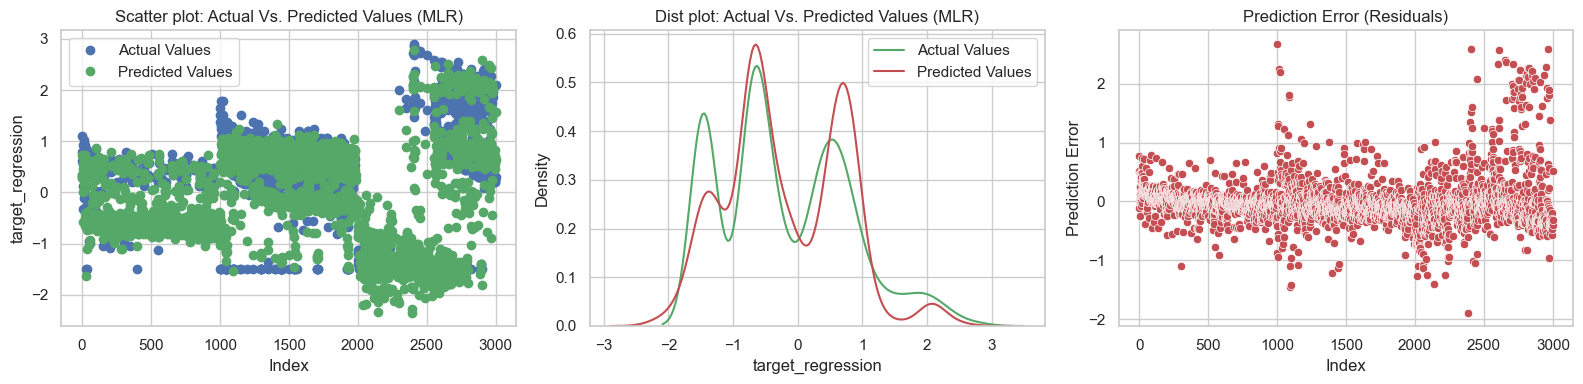

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

axes[0].plot(y, 'bo', label='Actual Values')
axes[0].plot(predictions_mlr, 'go', label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values (MLR)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("target_regression")
axes[0].legend()

sns.kdeplot(y.squeeze(), color="g", label="Actual Values", ax=axes[1])
sns.kdeplot(predictions_mlr.squeeze(), color="r", label="Predicted Values", ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values (MLR)")
axes[1].legend()

sns.scatterplot(x=y.index, y='mlr_error', data=df, color="r", ax=axes[2])
axes[2].set_title("Prediction Error (Residuals)")
axes[2].set_ylabel("Prediction Error")
axes[2].set_xlabel("Index")

fig.tight_layout()
plt.show()

# 4 Methods Application - Classification

Logistic Regression


In [78]:
# Drop columns created during regression
for col in ['mlr_result', 'mlr_error', 'slr_result', 'slr_error']:
    if col in df_class.columns:
        df_class.drop(columns=[col], inplace=True)


# Step 1: Setup
target_column = 'target_class'

# Select potential predictive features (you can adjust or reduce this list)
# features = [
#     'duration_1','duration_2','duration_3','duration_4','duration_5',
#     'loudness_level','popularity_level','tempo_class','time_signature',
#     'key_mode','artist_song_count','album_freq','movement_index',
#     'intensity_level','verbal_density','purity_score','positivity_index',
#     'activity_rate','loudness_intensity','happy_dance','acoustics_instrumental',
#     'artists_avg_popularity','tempo_vs_genre','energy_rank_pct','loud_energy_ratio',
#     'mood_pca','mood_cluster','acoustic_valence_mood_cluster','explicit',
#     'signal_strength','mode_indicator','focus_factor','ambient_level','key_sin',
#     'key_cos','duration_log','duration_log_z','time_signature_class_boolean',
#     'loudness_yeo','is_instrumental','is_dance_hit','temp_zscore','resonance_factor',
#     'timbre_index','echo_constant','distorted_movement','signal_power'
# ]

# Step 2: Data Cleaning and Encoding
# Replace commas with dots for numeric conversion
for col in features + [target_column]:
    df_class[col] = df_class[col].astype(str).str.replace(',', '.', regex=False)

# Convert to numeric when possible
for col in features:
    df_class[col] = pd.to_numeric(df_class[col], errors='coerce')

# Drop rows with missing data
df_class = df_class.dropna(subset=features + [target_column])

# Encode categorical target if necessary
le = LabelEncoder()
df_class[target_column] = le.fit_transform(df_class[target_column])

# Step 3: Split and Standardize
X = df_class[features]
y = df_class[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Train Logistic Regression Model
logr = LogisticRegression(max_iter=1000)
logr.fit(X_scaled, y)

# Predictions
y_pred = logr.predict(X_scaled)

# Step 5: Model Evaluation
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

Logistic Regression Performance:
Accuracy: 0.9066666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.95      0.96      0.96      1000
           2       0.91      0.90      0.90      1000

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000


Confusion Matrix:
[[864  44  92]
 [ 41 958   1]
 [ 99   3 898]]


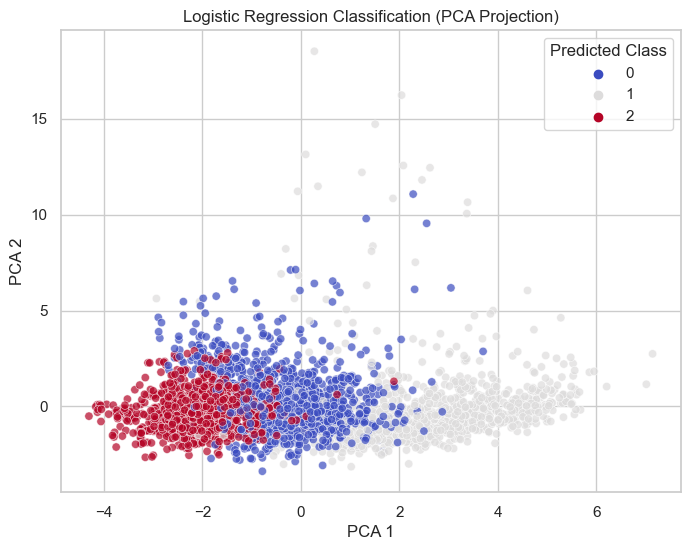

In [79]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred, palette='coolwarm', alpha=0.7)
plt.title('Logistic Regression Classification (PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Predicted Class')
plt.show()

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\ASUS\anaconda3\Lib\site-package

Model Validation Method  Mean Accuracy   Mean F1  Variance
0                   LDA        10-Fold CV       0.874667  0.874683  0.002194
1                   LDA         5-Fold CV       0.855667  0.853003  0.004554
2                   LDA         Bootstrap       0.887827  0.888780  0.000007
3                   LDA           Holdout       0.895000  0.895652       N/A
4                   LDA             LOOCV       0.886000  0.886000  0.101004
5   Logistic Regression        10-Fold CV       0.888667  0.888135  0.001327
6   Logistic Regression         5-Fold CV       0.882000  0.881018  0.001673
7   Logistic Regression         Bootstrap       0.904953  0.904951  0.000009
8   Logistic Regression           Holdout       0.916667  0.916985       N/A
9   Logistic Regression             LOOCV       0.897333  0.897333  0.092126
10                  QDA        10-Fold CV       0.612000  0.520923  0.000318
11                  QDA         5-Fold CV       0.610667  0.523867  0.000315
12                  QDA         Bootstrap       0.633047  0.558008  0.000462
13                  QDA           Holdout       0.596667  0.505280       N/A
14                  QDA             LOOCV       0.618000  0.618000  0.236076

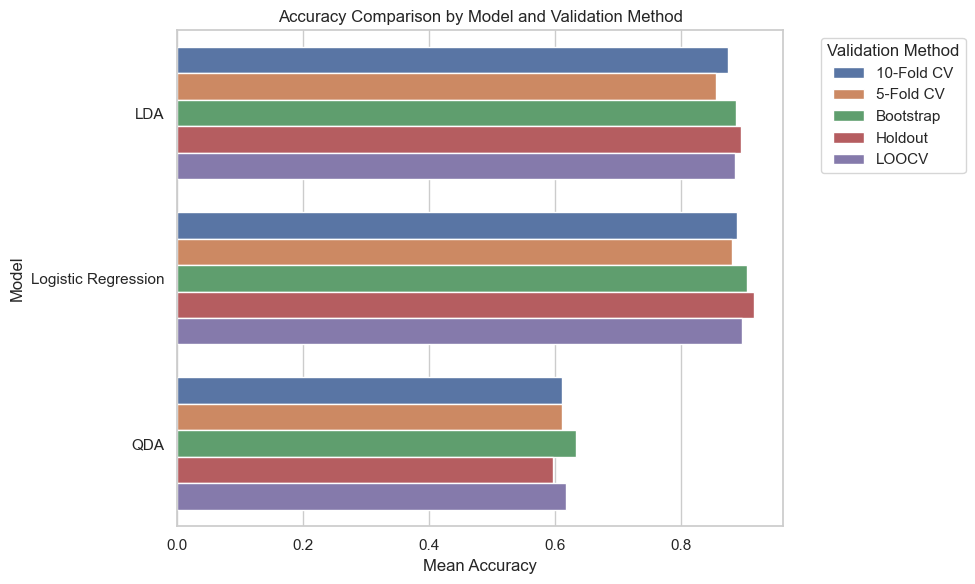

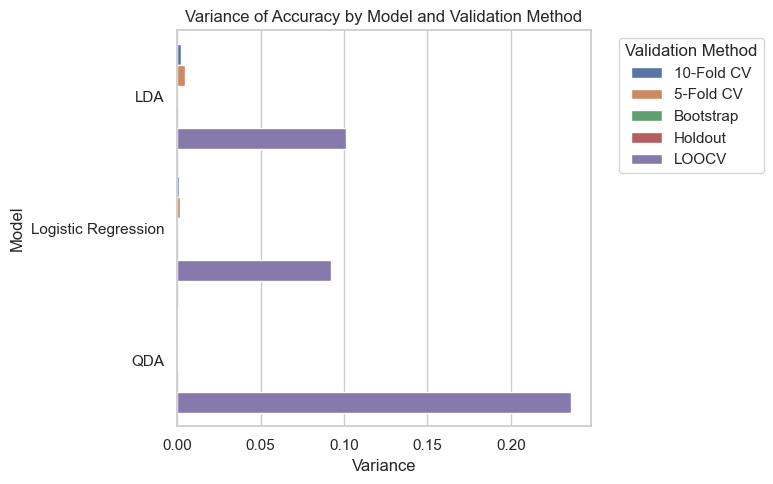


  Observations:
→ LDA: Best with Holdout (Accuracy=0.895, Variance=nan)
→ Logistic Regression: Best with Holdout (Accuracy=0.917, Variance=nan)
→ QDA: Best with Bootstrap (Accuracy=0.633, Variance=0.0004620889333333332)


In [ ]:
X = X_scaled
y = df_class['target_class']

# Define models (as per "aula_T_Classification.pdf")
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000, random_state=0),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),  # pode ficar sem PCA
#     'LDA': Pipeline([
#         ('pca', PCA(n_components=0.95, svd_solver='full')),
#         ('lda', LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'))
#     ]),
#     'QDA': Pipeline([
#         ('pca', PCA(n_components=0.95, svd_solver='full')),
#         ('qda', QuadraticDiscriminantAnalysis(reg_param=0.1))
#     ])
# }

# Helper function to evaluate models on a single split
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, f1

# Holdout Evaluation (80/20 split)
results = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    acc, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append([name, 'Holdout', acc, f1, np.nan])

# Cross Validation (k=5 and k=10)
for name, model in models.items():
    for k in [5, 10]:
        acc_scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')
        f1_scores = cross_val_score(model, X, y, cv=k, scoring='f1_weighted')
        results.append([
            name, f'{k}-Fold CV',
            np.mean(acc_scores),
            np.mean(f1_scores),
            np.var(acc_scores)
        ])

# Leave-One-Out Cross Validation (LOOCV)
loo = LeaveOneOut()
for name, model in models.items():
    acc_scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=loo, scoring='f1_weighted')
    results.append([
        name, 'LOOCV',
        np.mean(acc_scores),
        np.mean(f1_scores),
        np.var(acc_scores)
    ])

# Bootstrap (100 iterations)
n_iterations = 100
for name, model in models.items():
    acc_scores, f1_scores = [], []
    for i in range(n_iterations):
        X_bs, y_bs = resample(X, y, random_state=i)
        model.fit(X_bs, y_bs)
        y_pred = model.predict(X)
        acc_scores.append(accuracy_score(y, y_pred))
        f1_scores.append(f1_score(y, y_pred, average='weighted'))
    results.append([
        name, 'Bootstrap',
        np.mean(acc_scores),
        np.mean(f1_scores),
        np.var(acc_scores)
    ])

# Combine results into a single DataFrame
results_df = pd.DataFrame(results, columns=[
    'Model', 'Validation Method', 'Mean Accuracy', 'Mean F1', 'Variance'
])
results_df = results_df.sort_values(by=['Model', 'Validation Method']).reset_index(drop=True)
display(results_df.fillna('N/A'))

# Visualization — Accuracy by Validation Method
plt.figure(figsize=(10,6))
sns.barplot(x='Mean Accuracy', y='Model', hue='Validation Method', data=results_df)
plt.title('Accuracy Comparison by Model and Validation Method')
plt.xlabel('Mean Accuracy')
plt.ylabel('Model')
plt.legend(title='Validation Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualization — Variance by Model
plt.figure(figsize=(8,5))
sns.barplot(x='Variance', y='Model', hue='Validation Method', data=results_df)
plt.title('Variance of Accuracy by Model and Validation Method')
plt.xlabel('Variance')
plt.ylabel('Model')
plt.legend(title='Validation Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Discussion Summary (theoretical interpretation)

print("\n  Observations:")
for model in results_df['Model'].unique():
    subset = results_df[results_df['Model'] == model]
    best_row = subset.loc[subset['Mean Accuracy'].idxmax()]
    print(f"→ {model}: Best with {best_row['Validation Method']} "
          f"(Accuracy={best_row['Mean Accuracy']:.3f}, Variance={best_row['Variance']})")
